In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Download the data
df=pd.read_csv(r'.\water_potability.csv')
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

# Exploratory Data Analysis

In [3]:
#dimensions of the DataFrame d
df.shape

(3276, 10)

In [4]:
# the number of missing values 
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [5]:
# Display information about the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
#get the summary statistics
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [7]:
df['Sulfate'].mean()

333.7757766108135

In [8]:
# Count the frequency of each unique value in the 'Potability' column
df.Potability.value_counts()



Potability
0    1998
1    1278
Name: count, dtype: int64

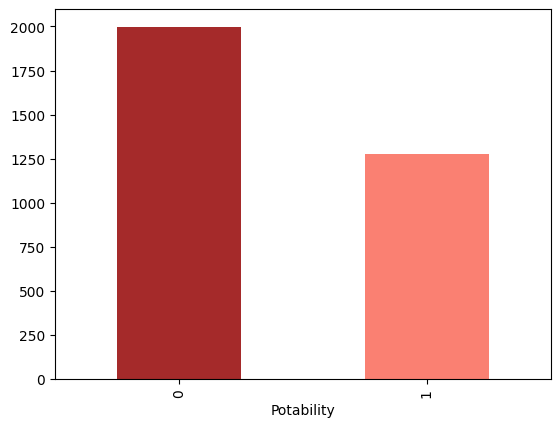

In [9]:
# Generate a bar plot of the frequency counts of 'Potability' and display it 

df.Potability.value_counts().plot(kind="bar", color=["brown", "salmon"])
plt.show()

<Axes: xlabel='ph', ylabel='Count'>

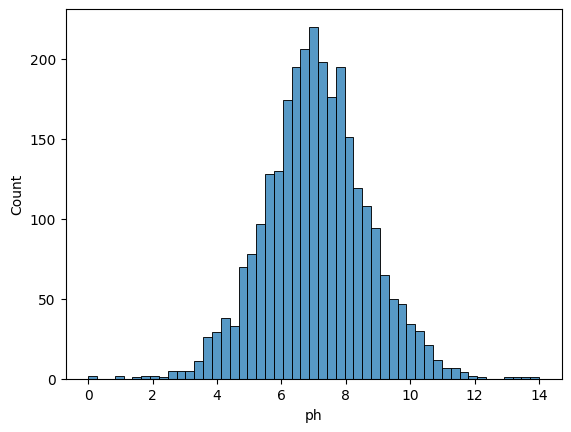

In [10]:
# Plot a histogram of the 'ph' column using Seaborn
sns.histplot(df['ph'])

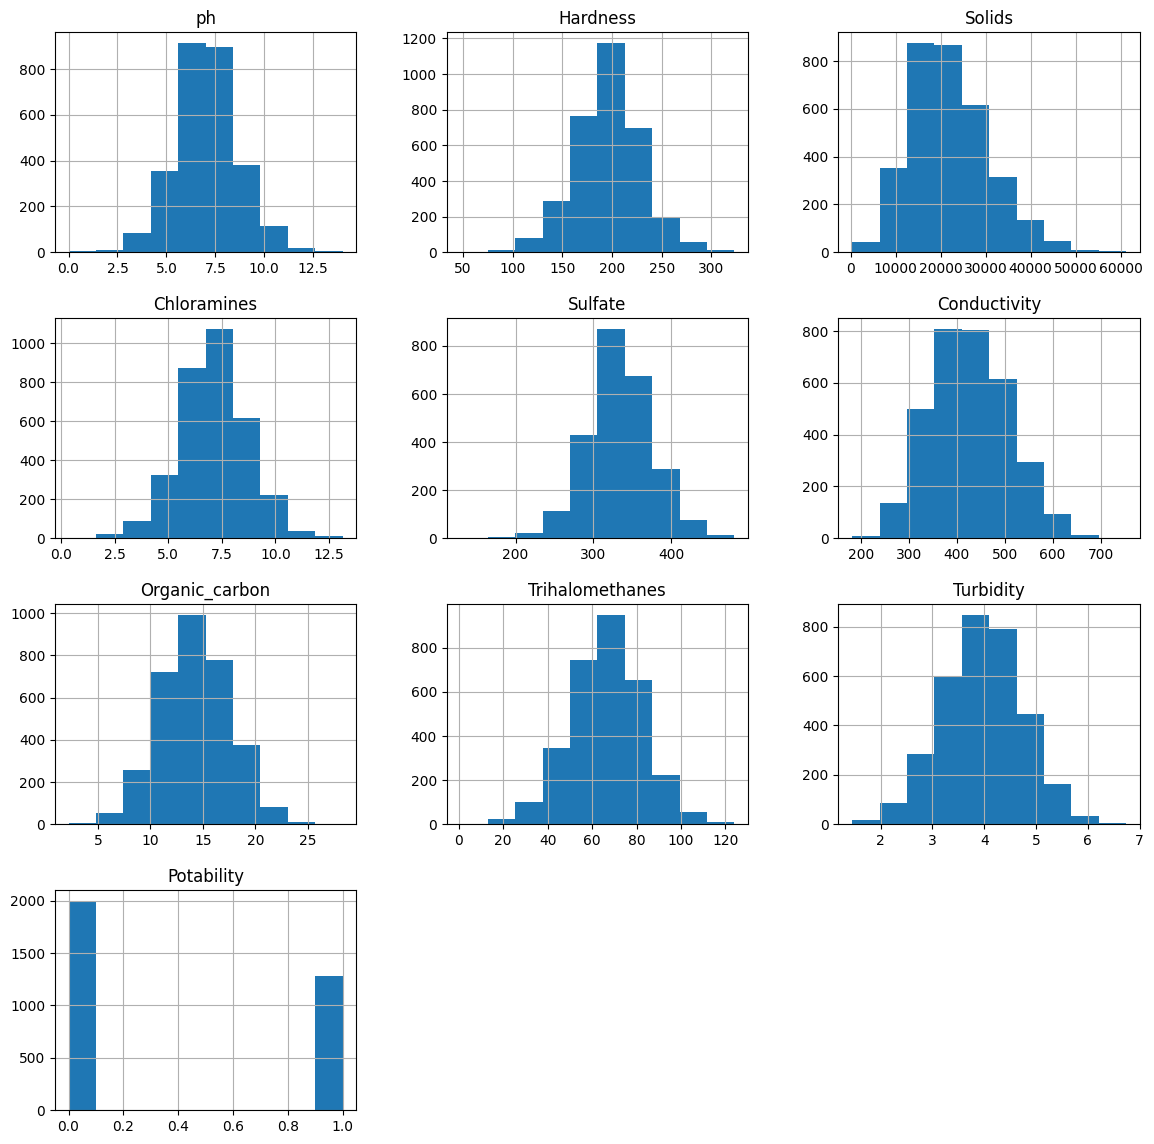

In [11]:
# Generate histograms for each numerical column in the DataFrame
df.hist(figsize=(14,14))
plt.show()

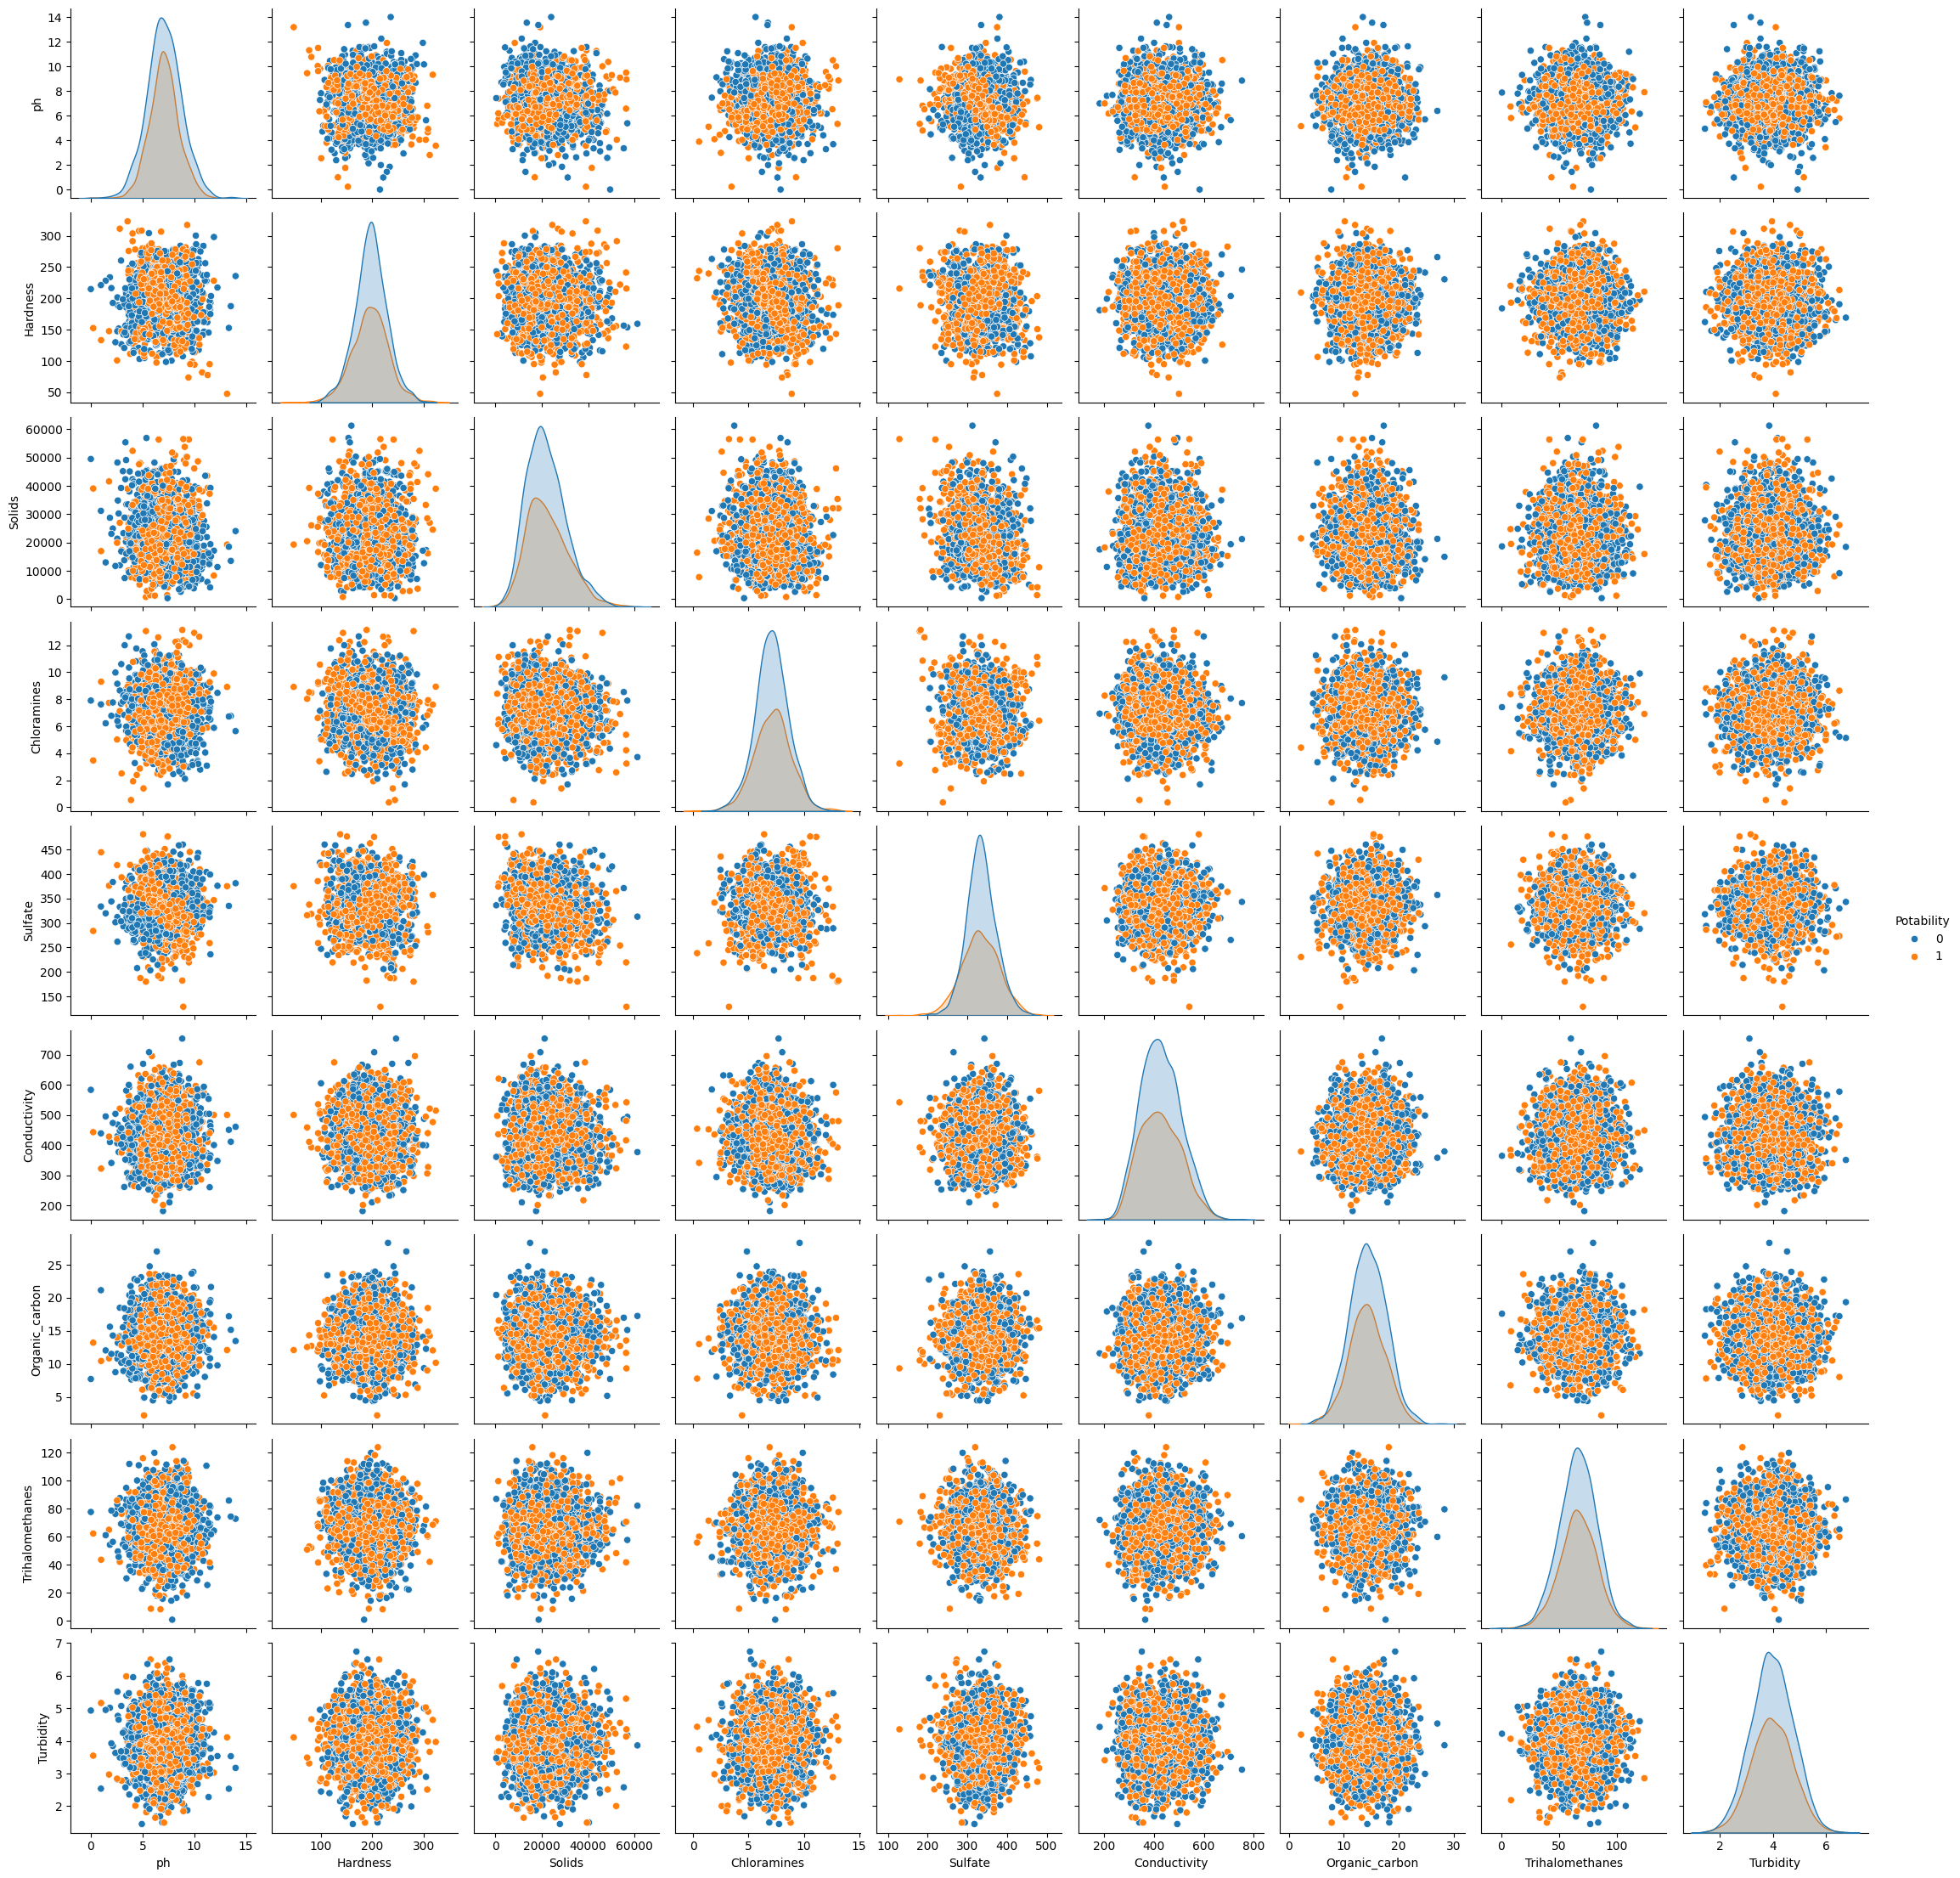

In [12]:
# Generate pairwise scatterplots colored by 'Potability'
sns.pairplot(df,hue='Potability')

<Axes: xlabel='Hardness', ylabel='Solids'>

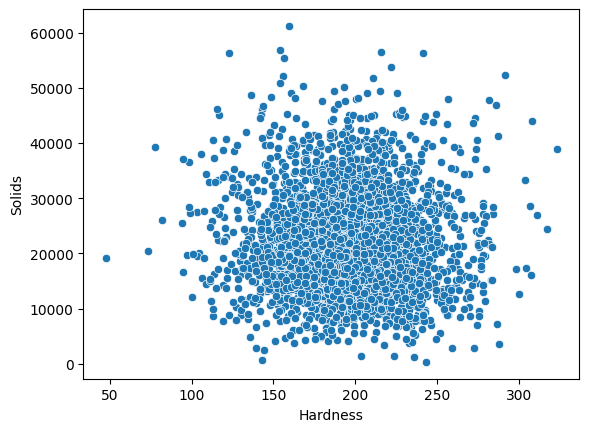

In [13]:
# Créer un nuage de points (scatter plot) pour 'hardness' vs 'Solids'
sns.scatterplot(x=df['Hardness'],y=df['Solids'])

<Axes: xlabel='ph', ylabel='Potability'>

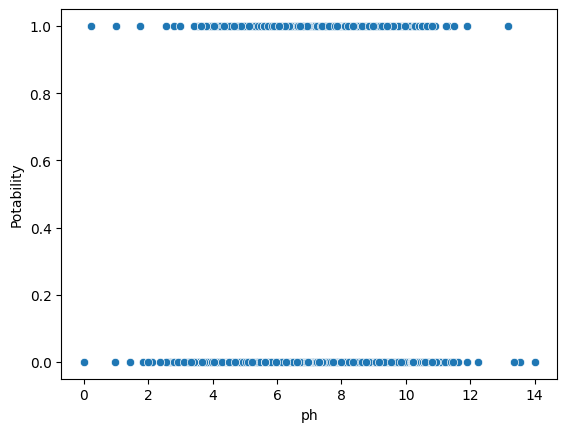

In [14]:
# Créer un nuage de points (scatter plot) pour 'ph' vs 'Potability'
sns.scatterplot(x=df['ph'],y=df['Potability'])

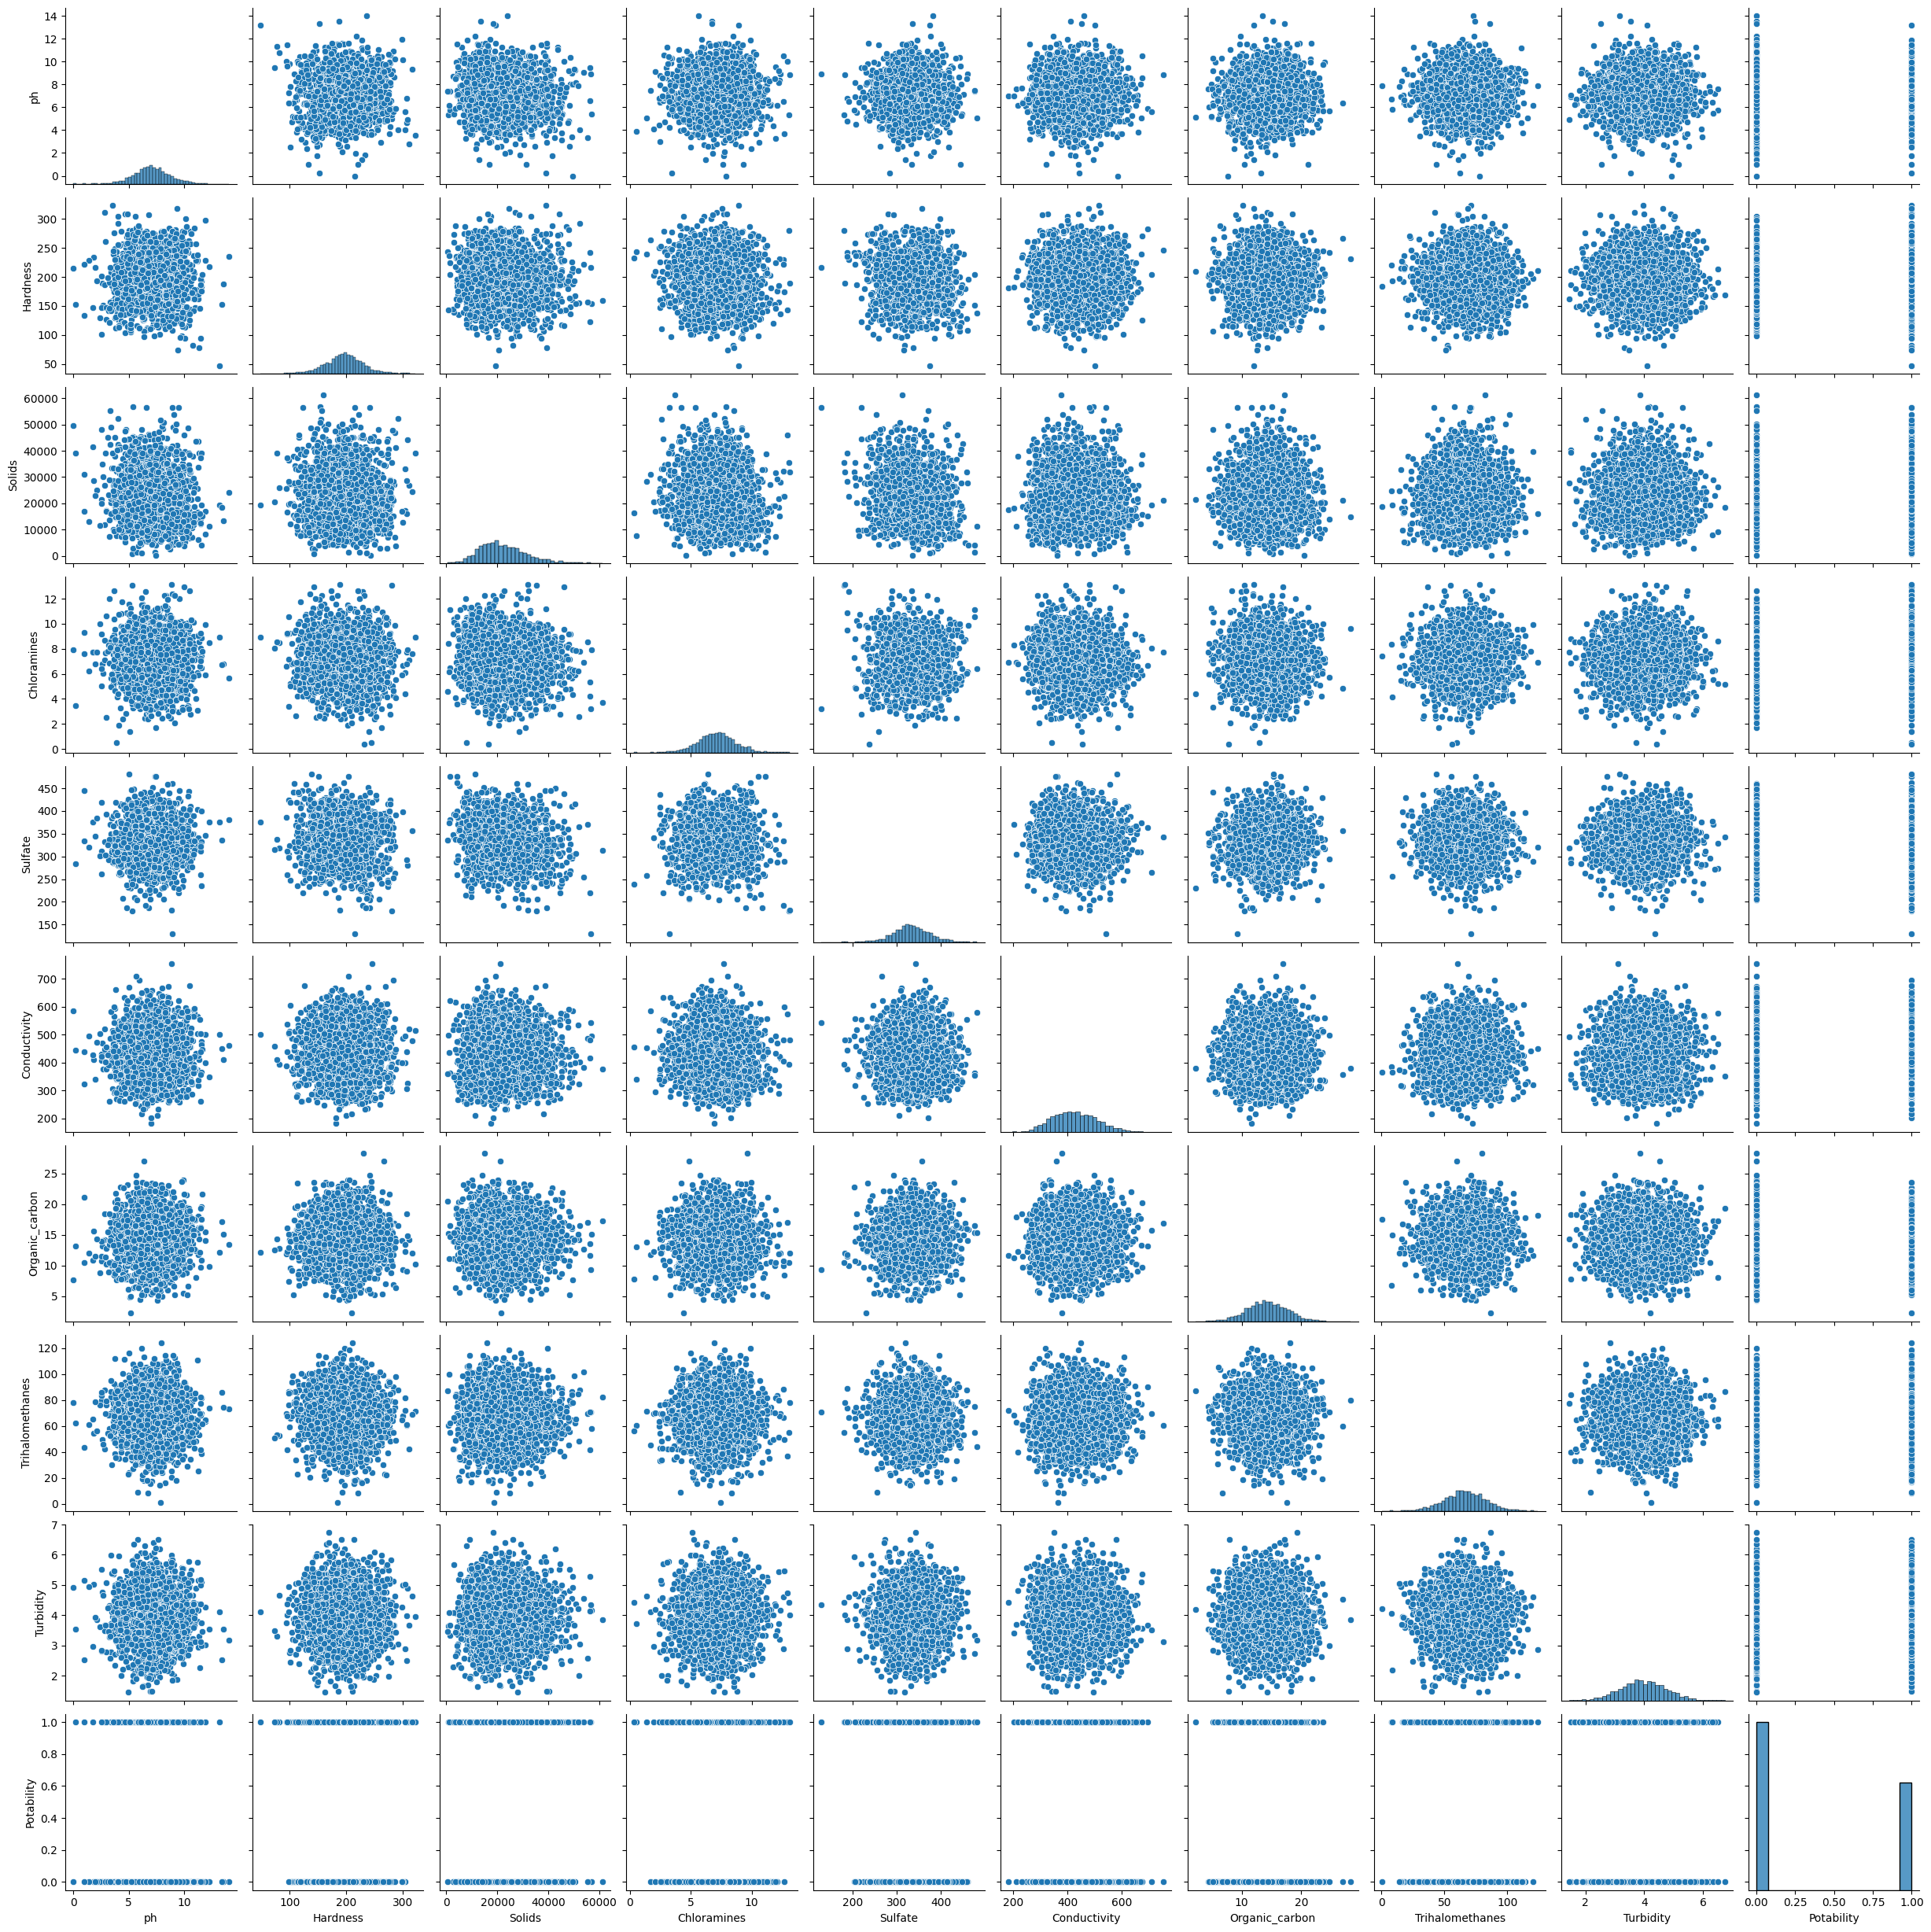

In [15]:
# Utiliser pairplot pour générer tous les scatter plots possibles
sns.pairplot(df)

# Afficher le graphique
plt.show()

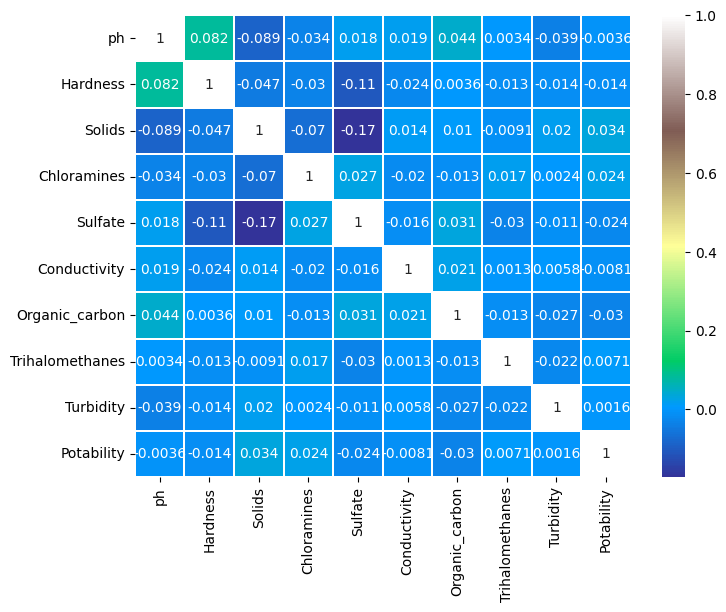

In [16]:
# create a correlation heatmap
sns.heatmap(df.corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

In [17]:
#|r| < 0.3 ==> Faible corrélation.

<Axes: >

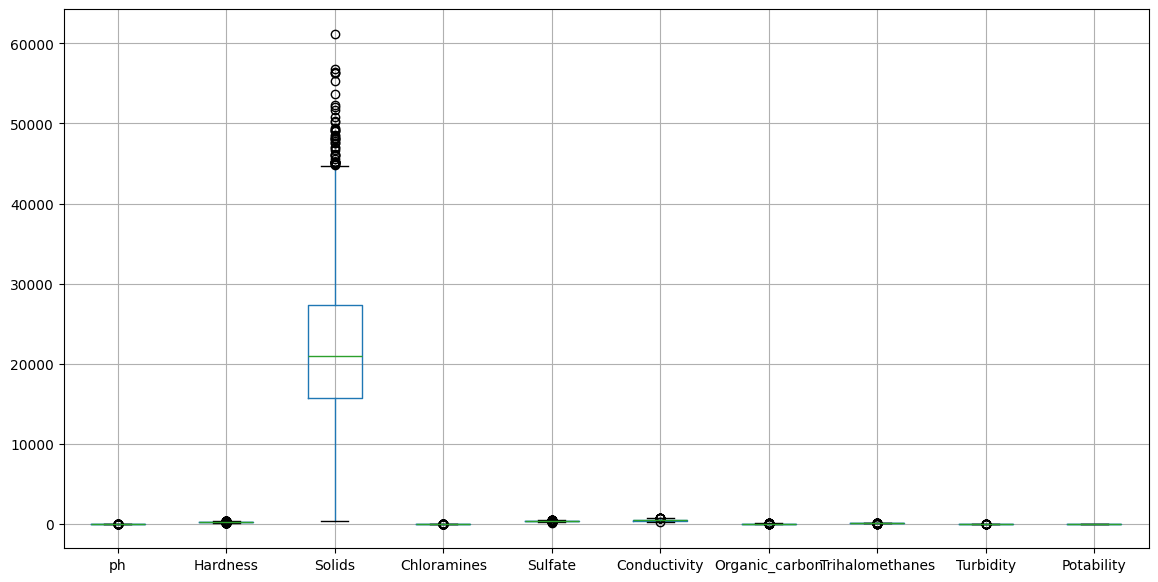

In [18]:
df.boxplot(figsize=(14,7))

In [19]:
df['Solids'].describe()

count     3276.000000
mean     22014.092526
std       8768.570828
min        320.942611
25%      15666.690297
50%      20927.833607
75%      27332.762127
max      61227.196008
Name: Solids, dtype: float64

Cleaning and data preparation

In [20]:
#Gestion des valeurs manquantes :
# Fill missing values with the mean of each column
df.fillna(df.mean(), inplace=True)
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [21]:
# the number of missing values 
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

            ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.080795  204.890455  20791.318981     7.300212  368.516441   
1     7.080795  129.422921  18630.057858     6.635246  333.775777   
2     8.099124  224.236259  19909.541732     9.275884  333.775777   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  22014.092526     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  333.775777   
3273  9.419510  175.762646  33155.578218     7.350233  333.775777   
3274  5.126763  230.603758  11983.869376     6.303357  333.775777   
3275  7.874671  195.102299  17404.177061     7.509306  333.775777   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.88535

<Axes: >

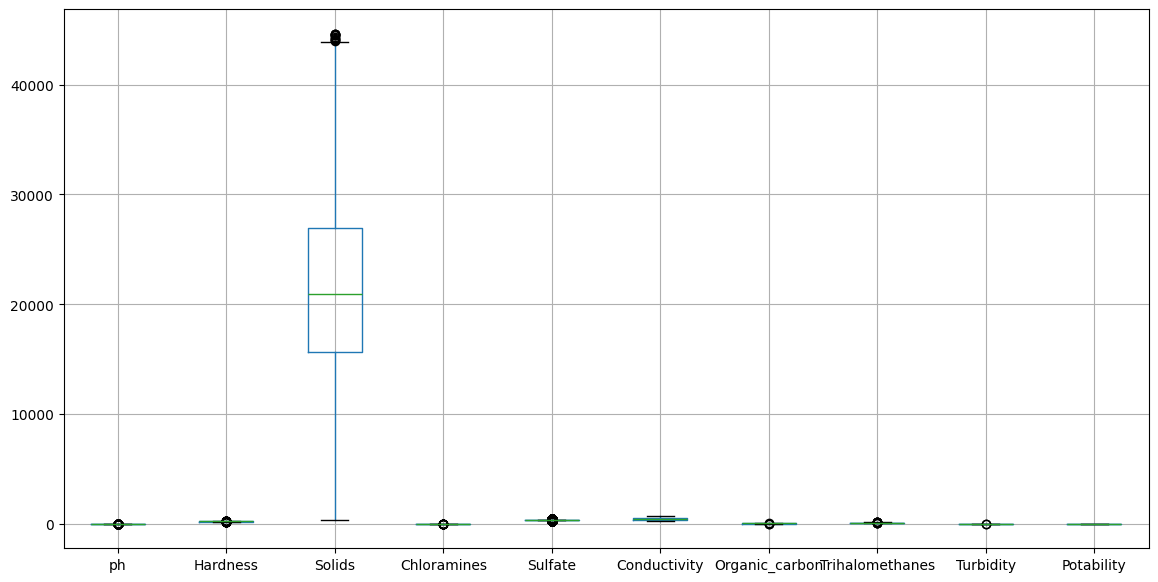

In [22]:
#Gestion des outliers :
# Fonction pour remplacer les outliers par la moyenne de chaque colonne
def replace_outliers_with_mean(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    column[column < lower_bound] = column.mean()
    column[column > upper_bound] = column.mean()
    return column

# Appliquer la fonction à chaque colonne du DataFrame
df = df.apply(replace_outliers_with_mean, axis=0)
print(df)
df.boxplot(figsize=(14,7))


# Normalization

In [23]:
from sklearn.preprocessing import StandardScaler
# Sélectionner les colonnes à normaliser
columns_to_normalize = df.columns.difference(['Potability'])
# Instancier un objet StandardScaler

sc=StandardScaler()

In [24]:
# Appliquer la normalisation sur les données sélectionnées
df_normalized = pd.DataFrame(sc.fit_transform(df[columns_to_normalize]), columns=columns_to_normalize)

# Concaténer la colonne 'Potability' avec les données normalisées
df_normalized = pd.concat([df_normalized, df['Potability']], axis=1)
print(df_normalized)

      Chloramines  Conductivity  Hardness  Organic_carbon    Solids   Sulfate  \
0        0.122299      1.747388  0.284779       -1.223469 -0.103048  1.358913   
1       -0.337732      2.107127 -2.282372        0.279961 -0.368679 -0.001476   
2        1.489093     -0.086792  0.942858        0.808837 -0.211423 -0.001476   
3        0.647468     -0.783437  0.607357        1.299899  0.047769  0.903488   
4       -0.399059     -0.341022 -0.524441       -0.854364 -0.448699 -0.927182   
...           ...           ...       ...             ...       ...       ...   
3271     0.029892      1.270478 -0.096504       -0.122687  0.047238  1.023409   
3272     0.648872     -0.416065 -0.100876        1.759269 -0.528487 -0.001476   
3273     0.156905      0.082380 -0.706051       -1.016981  1.416588 -0.001476   
3274    -0.567337     -0.284723  1.159459       -0.976303 -1.185532 -0.001476   
3275     0.266953     -1.234192 -0.048181        0.580744 -0.519346 -0.001476   

      Trihalomethanes  Turb

# Partitioning

In [25]:
# Sélection des caractéristiques (features) pour l'ensemble d'entraînement (X)
X = df_normalized.drop('Potability', axis=1)

# Sélection de la variable cible pour l'ensemble d'entraînement (Y)
Y = df_normalized['Potability']

In [26]:
from sklearn.model_selection import train_test_split
# Diviser l'ensemble de données en ensembles d'entraînement et de test
# X_train et X_test contiennent les caractéristiques (features) pour l'entraînement et le test, respectivement
# Y_train et Y_test contiennent les étiquettes (labels) correspondantes à X_train et X_test, respectivement
# test_size=0.25 indique que 25% des données sont réservées pour l'ensemble de test
# random_state=101 assure la reproductibilité des résultats en fixant la graine aléatoire
# shuffle=True indique que les données seront mélangées avant la division
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101, shuffle=True)

In [27]:
Y_train.value_counts()

Potability
0    1596
1    1024
Name: count, dtype: int64

In [28]:
Y_test.value_counts()


Potability
0    402
1    254
Name: count, dtype: int64

# Model Building

# DT

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
# Instancier un modèle de classification par arbre de décision avec les paramètres spécifiés
# criterion='entropy' utilise l'entropie comme critère pour mesurer la qualité des splits
# min_samples_split=10 spécifie le nombre minimum d'échantillons requis pour spliter un nœud
# splitter='best' indique que la meilleure stratégie sera utilisée pour choisir le split à chaque nœud
# random_state=101 assure la reproductibilité des résultats en fixant la graine aléatoire
dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=10, splitter='best', random_state=101)

# Entraîner le modèle sur l'ensemble d'entraînement
dt.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=10,
                       random_state=101)

In [30]:
# Prédire les labels sur l'ensemble de test
Y_pred = dt.predict(X_test)



In [31]:
# Calculer et imprimer les métriques d'évaluation
print("Accuracy:", accuracy_score(Y_test, Y_pred)*100)
print("Precision:", precision_score(Y_test, Y_pred)*100)
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))

Accuracy: 57.77439024390244
Precision: 45.593869731800766
Confusion Matrix:
 [[260 142]
 [135 119]]


In [32]:
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, Y_test)))

Accuracy on training set: 0.922
Accuracy on test set: 0.578


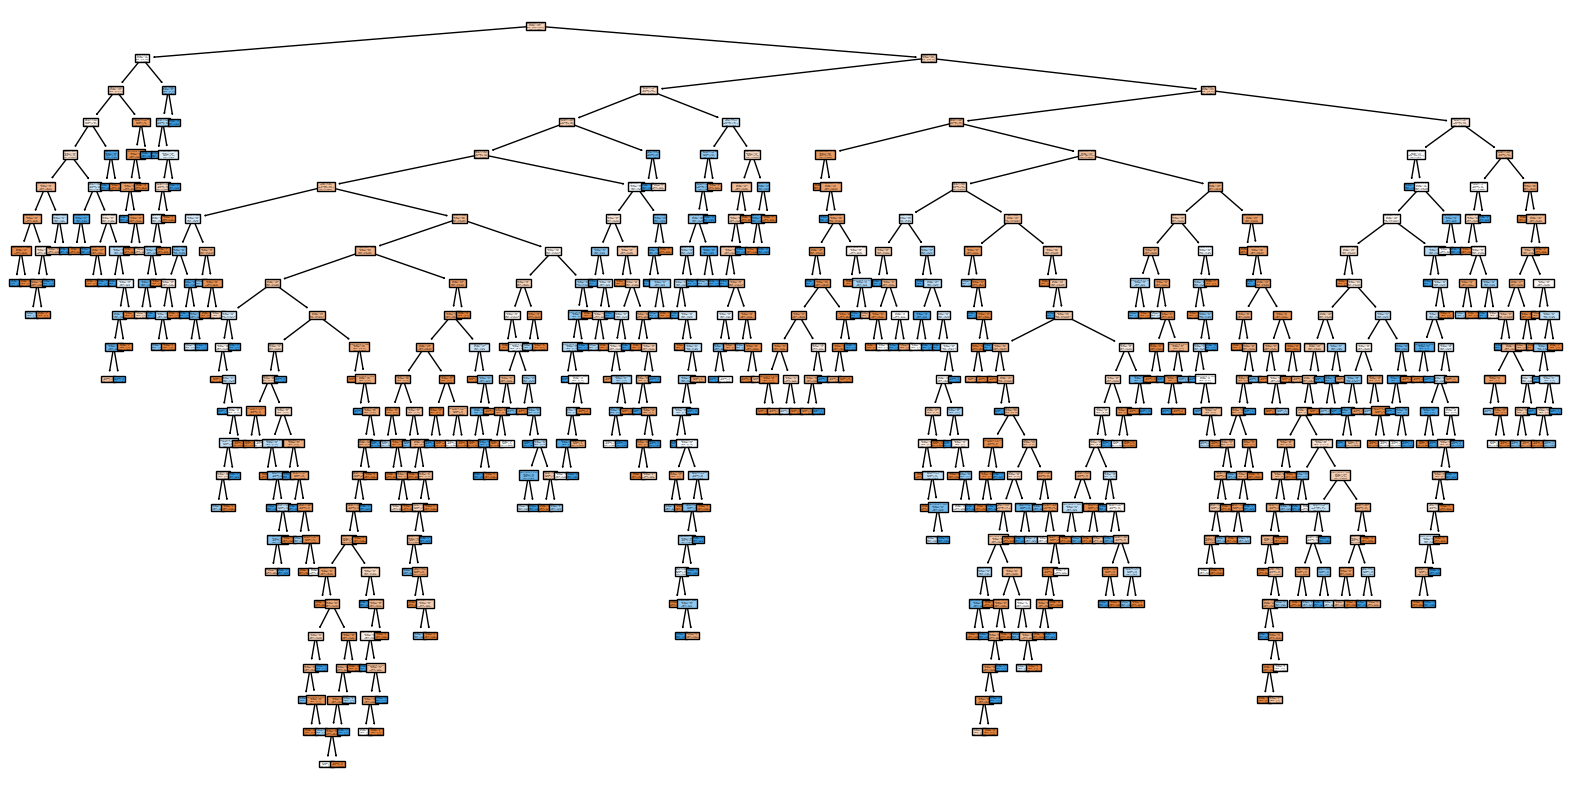

In [33]:

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

x = df  # Use the entire DataFrame as features

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=x.columns, class_names=['No potable', 'potable'], filled=True)
plt.show()


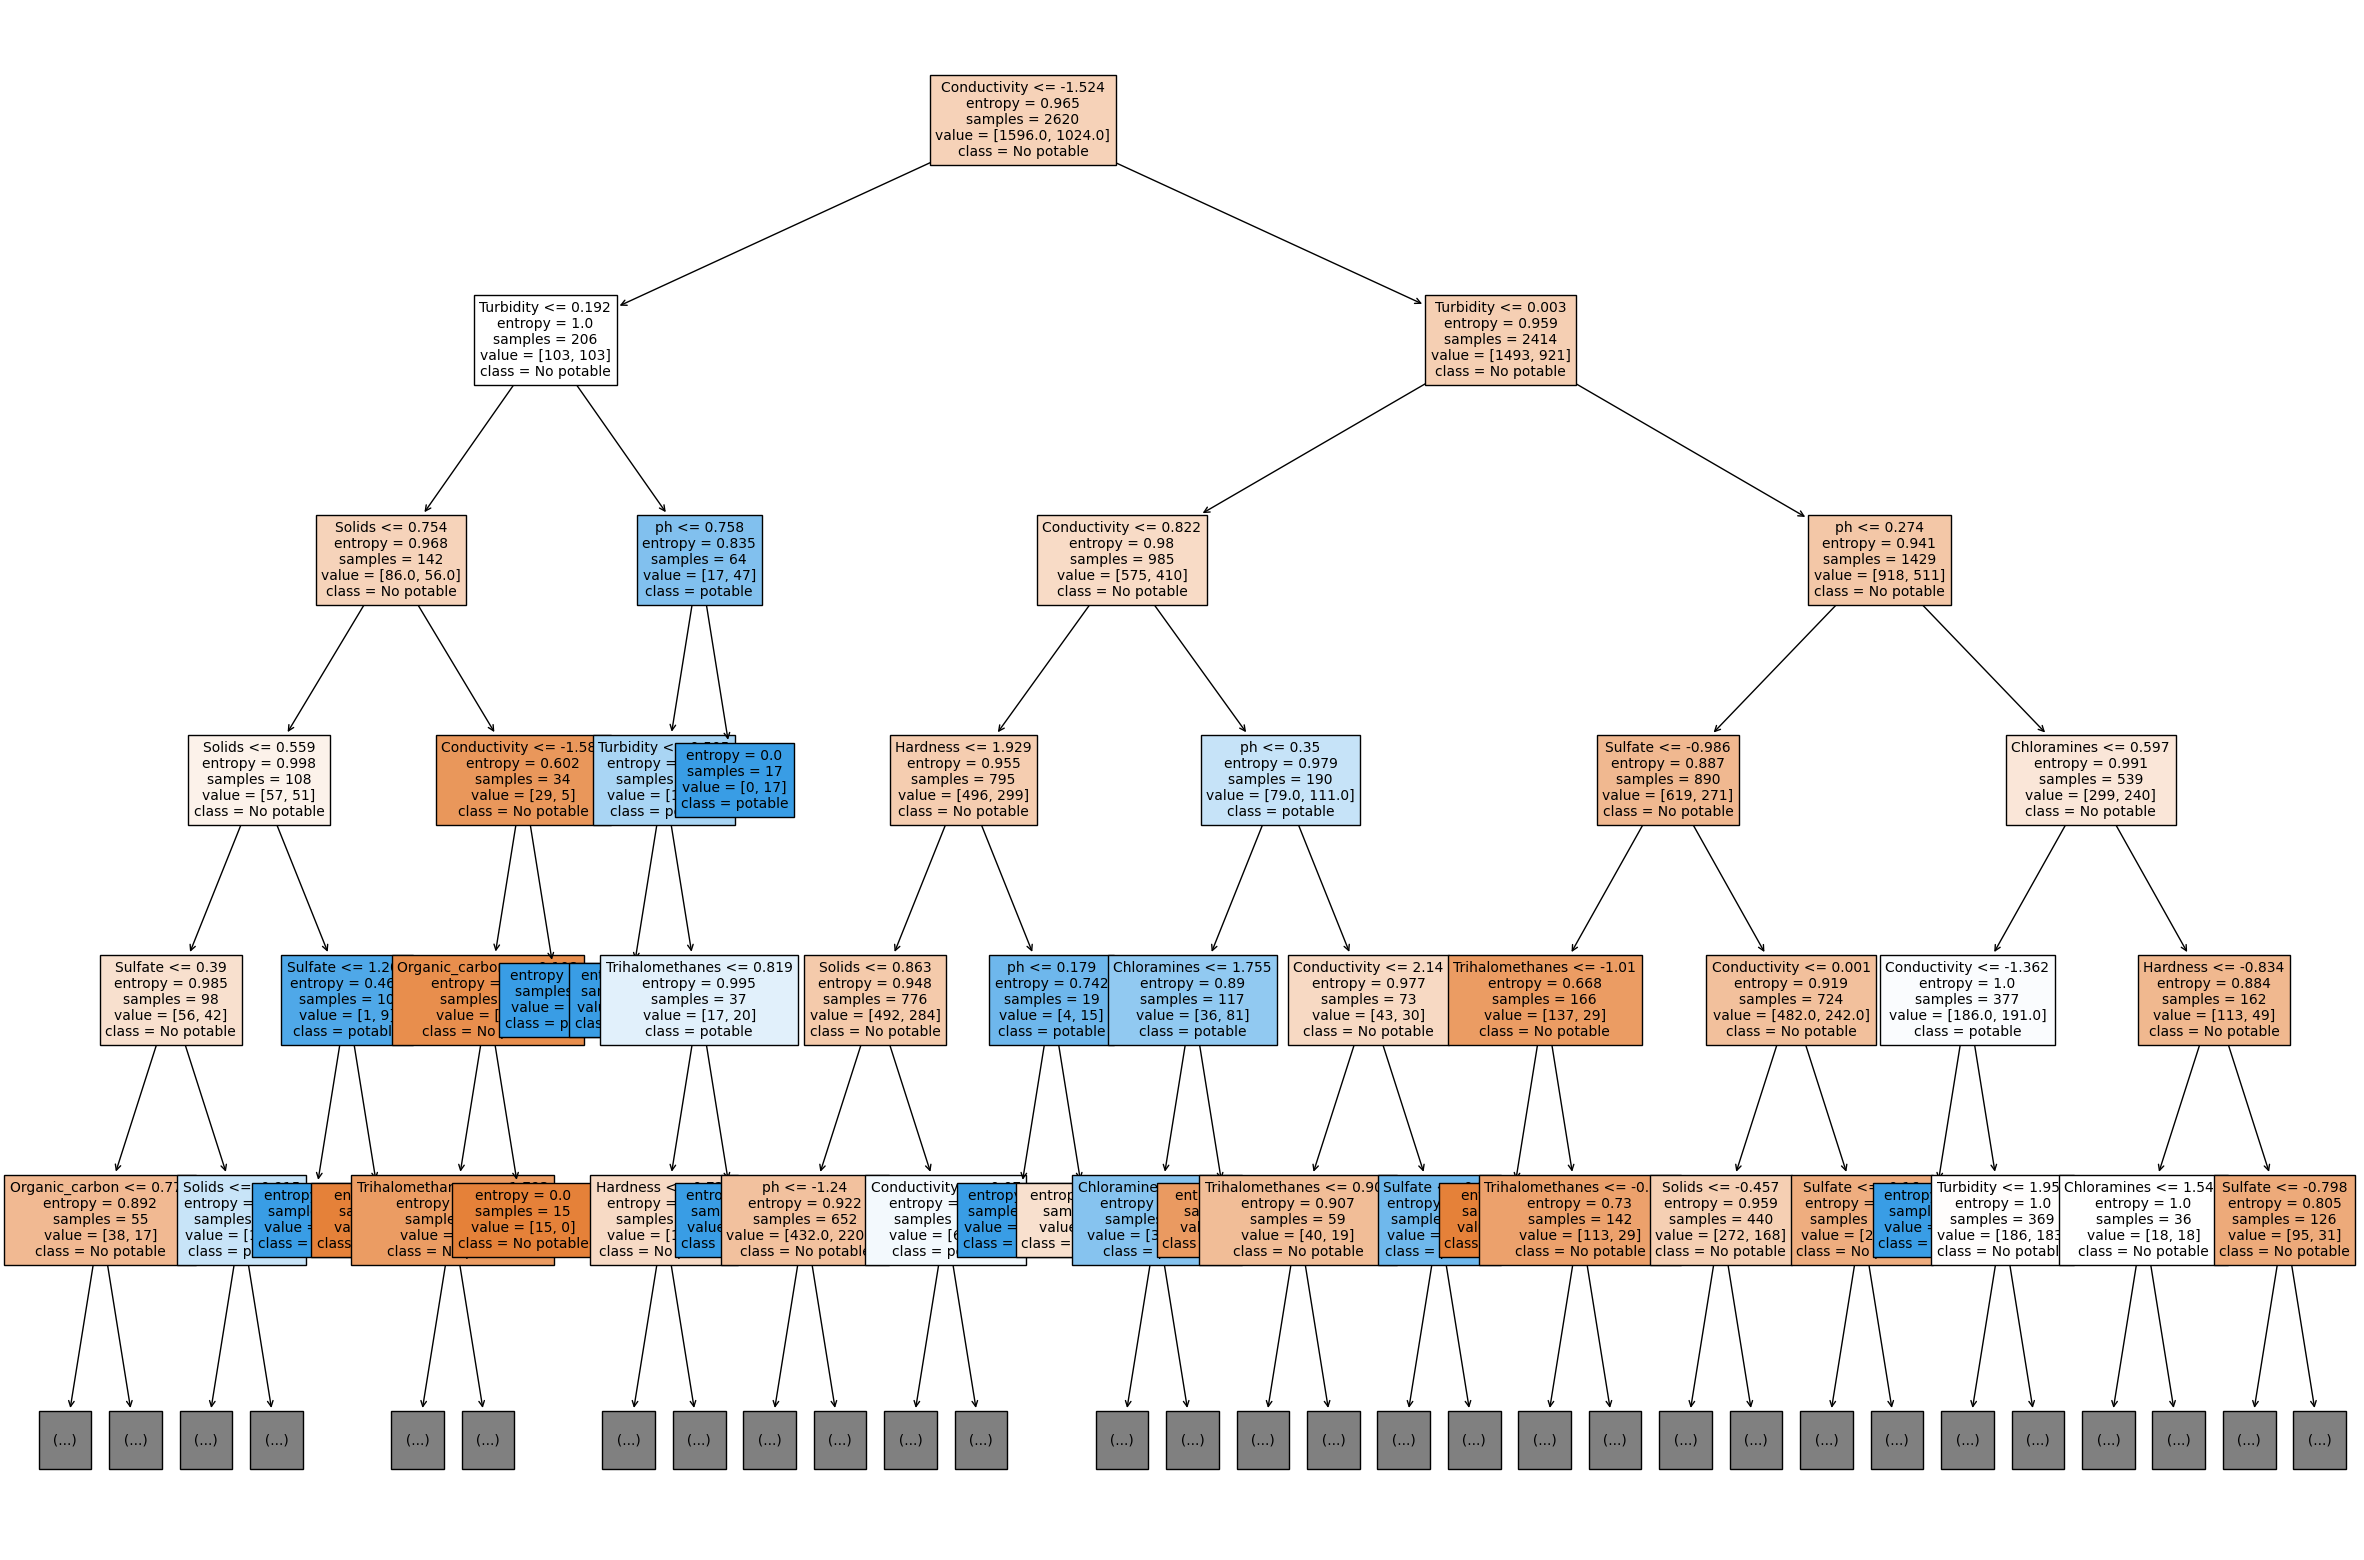

In [34]:
plt.figure(figsize=(30,20))  # Increase figure size
plot_tree(dt, 
           feature_names=x.columns, 
           class_names=['No potable', 'potable'], 
           filled=True, 
           fontsize=10,  # Adjust font size
           max_depth=5)  # Limit maximum depth
plt.show()

In [35]:
from sklearn.tree import export_text

# Exclude the target column from feature_names
feature_names = df.drop(columns=['Potability']).columns.tolist()

# Get textual representation of the decision tree
tree_text = export_text(dt, feature_names=feature_names)
print(tree_text)


|--- Conductivity <= -1.52
|   |--- Turbidity <= 0.19
|   |   |--- Solids <= 0.75
|   |   |   |--- Solids <= 0.56
|   |   |   |   |--- Sulfate <= 0.39
|   |   |   |   |   |--- Organic_carbon <= 0.78
|   |   |   |   |   |   |--- Chloramines <= -0.12
|   |   |   |   |   |   |   |--- Organic_carbon <= -2.40
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- Organic_carbon >  -2.40
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Chloramines >  -0.12
|   |   |   |   |   |   |   |--- Turbidity <= -0.04
|   |   |   |   |   |   |   |   |--- Turbidity <= -0.99
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- Turbidity >  -0.99
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- Turbidity >  -0.04
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Organic_carbon >  0.78
|   |   |   |   |   |   |--- Hardness <= 0.41
|   |   |   |   |   |   |   |--- class:

In [36]:
print("Feature importances:\n{}".format(dt.feature_importances_))

Feature importances:
[0.11297459 0.11112281 0.12048317 0.10869033 0.15112246 0.10564205
 0.08777802 0.09508265 0.10710391]


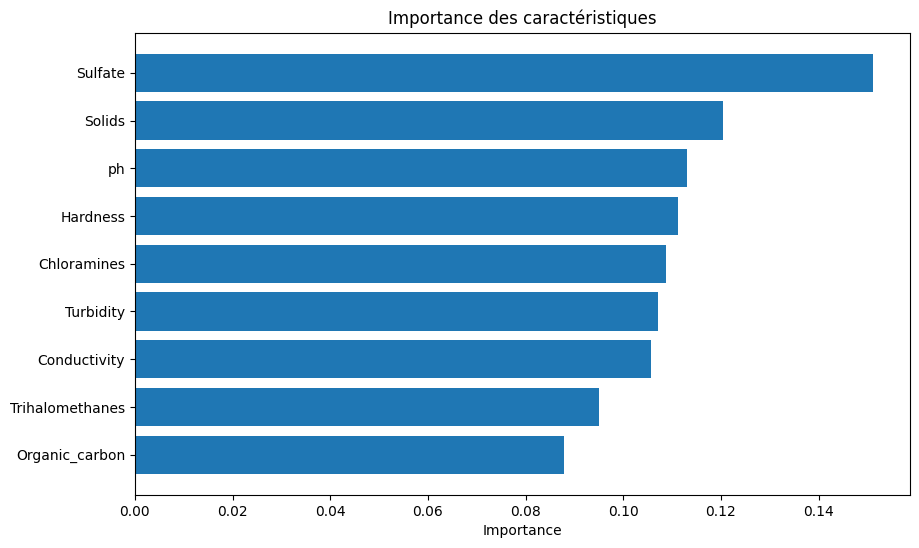

In [37]:
# Récupérer l'importance des caractéristiques
importances = dt.feature_importances_
# Noms des caractéristiques
feature_names = df.columns
# Trier les indices des caractéristiques par importance
sorted_idx = importances.argsort()
# Plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Importance')
plt.title('Importance des caractéristiques')
plt.show()

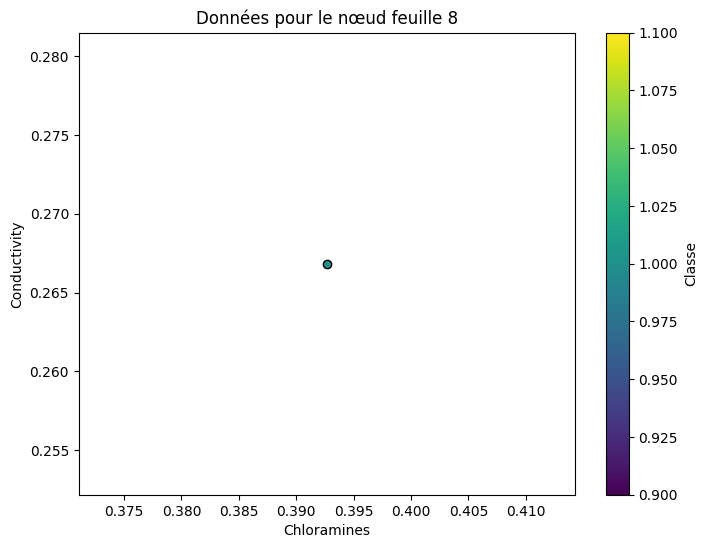

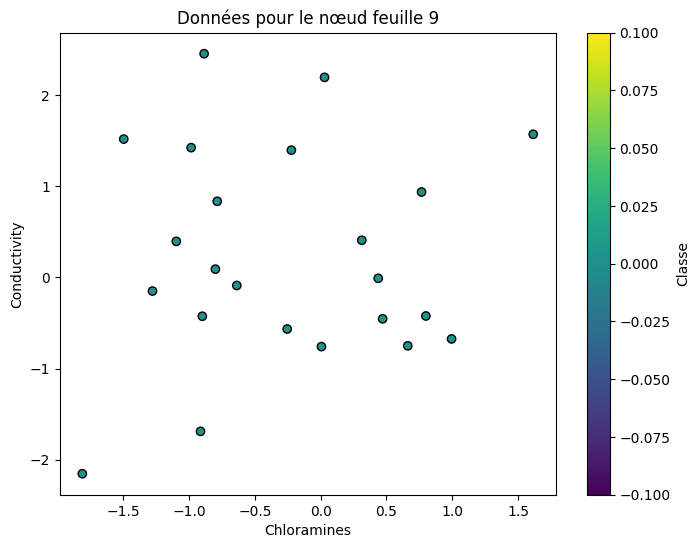

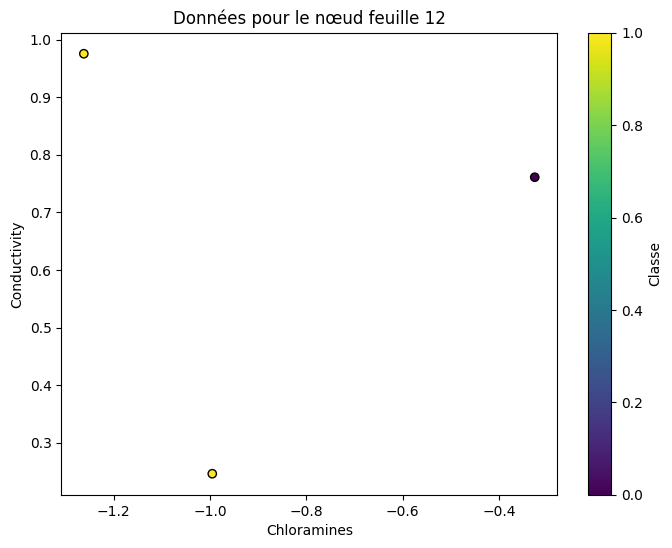

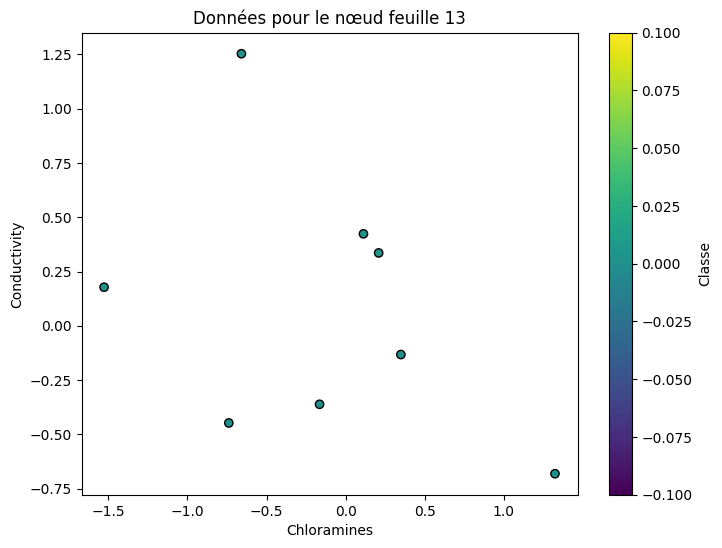

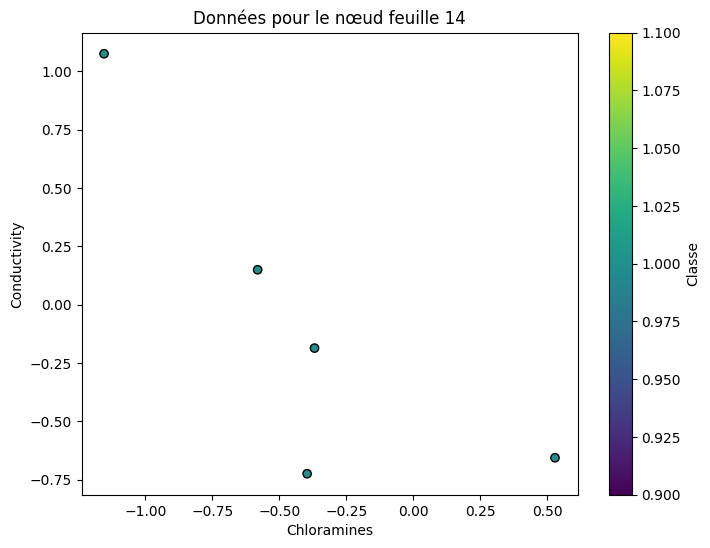

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Créer une fonction pour récupérer les indices des échantillons pour chaque nœud feuille
def get_leaf_samples(tree, node_id):
    left_child = tree.children_left[node_id]
    right_child = tree.children_right[node_id]
    
    if left_child == right_child:  # Si c'est un nœud feuille
        samples = np.where(tree.apply(X_train.values.astype(np.float32)) == node_id)[0]
        return samples
    
    else:
        left_samples = get_leaf_samples(tree, left_child)
        right_samples = get_leaf_samples(tree, right_child)
        return np.concatenate([left_samples, right_samples])

# Sélectionnez 3 à 5 nœuds feuilles
leaf_nodes = np.where(dt.tree_.children_left == -1)[0]  # Trouver les indices des nœuds feuilles
leaf_nodes = leaf_nodes[:5]  # Sélectionnez les 5 premiers nœuds feuilles

# Afficher les données pour chaque nœud feuille
for node_id in leaf_nodes:
    samples = get_leaf_samples(dt.tree_, node_id)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(X_train.iloc[samples, 0], X_train.iloc[samples, 1], c=Y_train.iloc[samples], cmap='viridis', edgecolors='k')
    plt.title(f'Données pour le nœud feuille {node_id}')
    plt.xlabel(X_train.columns[0])
    plt.ylabel(X_train.columns[1])
    plt.colorbar(label='Classe')
    plt.show()



#PrePruning

In [39]:
from sklearn.model_selection import GridSearchCV

# Définir la grille de paramètres à tester
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [ 1,2, 5, 10],
    'max_leaf_nodes': [ 5, 10, 15],
    'splitter': ['best', 'random']
}

# Instancier le modèle de classification par arbre de décision
d = DecisionTreeClassifier(random_state=101)

# Utiliser GridSearchCV pour rechercher les meilleurs paramètres
grid_search = GridSearchCV(d, param_grid, cv=6, verbose=1, n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Afficher les meilleurs paramètres
print("Best parameters found: ", grid_search.best_params_)

Fitting 6 folds for each of 768 candidates, totalling 4608 fits
Best parameters found:  {'criterion': 'entropy', 'max_depth': 7, 'max_leaf_nodes': 15, 'min_samples_leaf': 5, 'min_samples_split': 2, 'splitter': 'random'}


In [40]:
# Définir les paramètres de pré-pruning
params = {
    'criterion': 'entropy',          # Utilisation de l'entropie comme critère de split
    'max_depth': 7,                  # Profondeur maximale de l'arbre
    'min_samples_split': 2,         # Nombre minimum d'échantillons requis pour spliter un nœud
    'min_samples_leaf': 5,          # Nombre minimum d'échantillons requis pour être à un nœud feuille
    'max_leaf_nodes': 15,            # Nombre maximal de feuilles
    'random_state': 101 ,            # Graine aléatoire pour la reproductibilité
    'splitter': 'random'             # Utilisation du splitter random
}

# Instancier le modèle de classification par arbre de décision avec pré-pruning
dt_pruned = DecisionTreeClassifier(**params)

# Entraîner le modèle sur l'ensemble d'entraînement
dt_pruned.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_leaf_nodes=15,
                       min_samples_leaf=5, random_state=101, splitter='random')

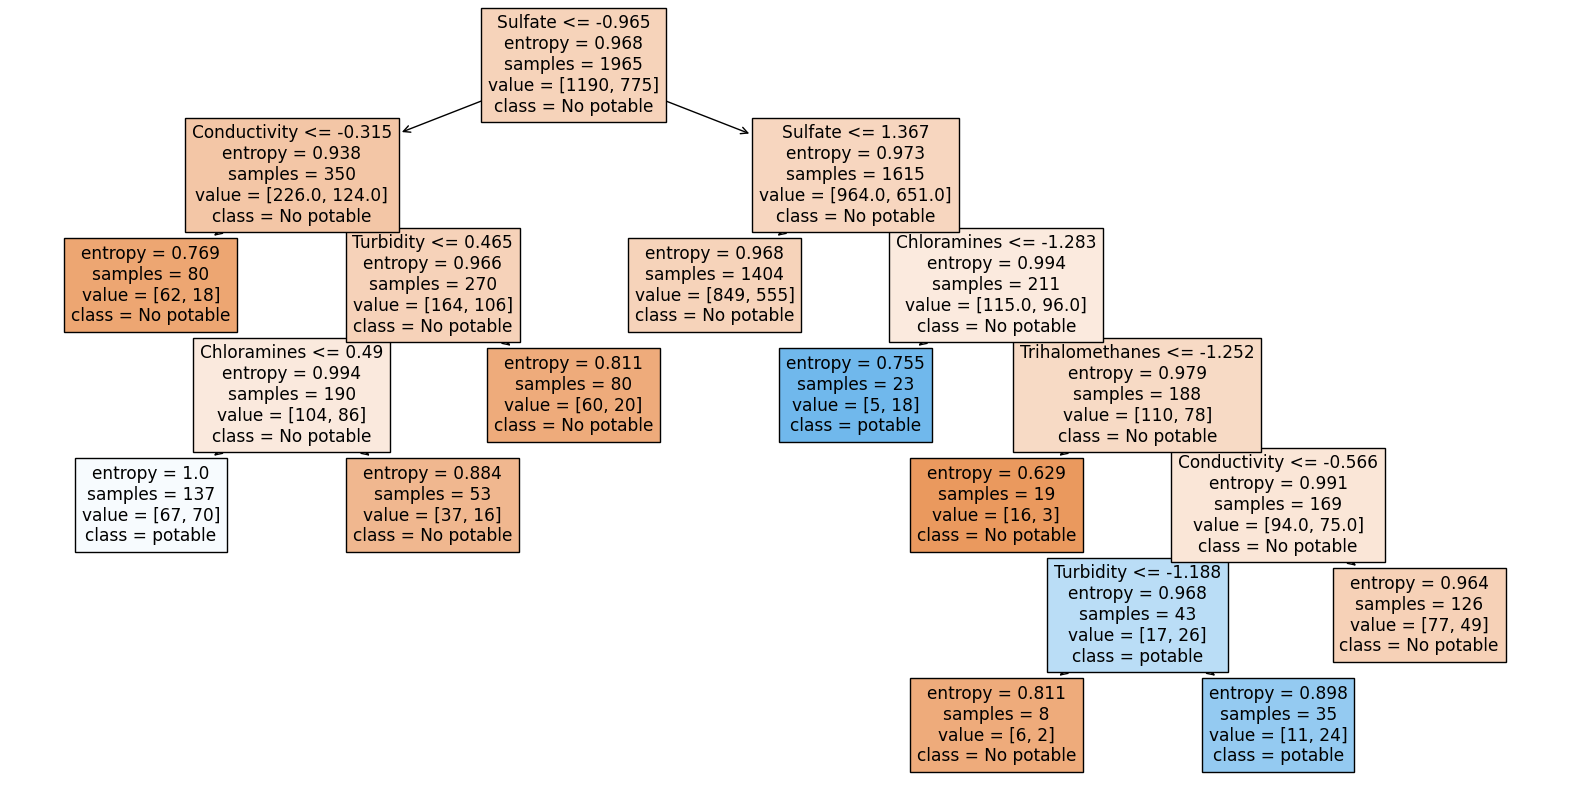

In [48]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_pruned, feature_names=x.columns, class_names=['No potable', 'potable'], filled=True)
plt.show()

In [41]:
# Précision sur l'ensemble d'entraînement
Y_train_pred = dt_pruned.predict(X_train)
train_accuracy = accuracy_score(Y_train, Y_train_pred)
print(f"Accuracy on training set: {train_accuracy:.3f}")

# Précision sur l'ensemble de test
Y_test_pred = dt_pruned.predict(X_test)
test_accuracy = accuracy_score(Y_test, Y_test_pred)
print(f"Accuracy on test set: {test_accuracy:.3f}")

Accuracy on training set: 0.618
Accuracy on test set: 0.630


In [42]:
# Profondeur de l'arbre original
original_tree_depth = dt.get_depth()
print(f"Depth of the original tree: {original_tree_depth}")

# Nombre de feuilles de l'arbre original
original_tree_leaves = dt.get_n_leaves()
print(f"Number of leaves in the original tree: {original_tree_leaves}")

# Profondeur de l'arbre élagué
pruned_tree_depth = dt_pruned.get_depth()
print(f"Depth of the pruned tree: {pruned_tree_depth}")

# Nombre de feuilles de l'arbre élagué
pruned_tree_leaves = dt_pruned.get_n_leaves()
print(f"Number of leaves in the pruned tree: {pruned_tree_leaves}")


Depth of the original tree: 23
Number of leaves in the original tree: 368
Depth of the pruned tree: 7
Number of leaves in the pruned tree: 15


Post-Pruning

In [52]:
# Séparation des données en ensembles d'entraînement, de validation et de test
X_train1, X_temp, Y_train1, Y_temp = train_test_split(X, Y, test_size=0.4, random_state=101, shuffle=True)
X_val, X_test1, Y_val, Y_test1 = train_test_split(X_temp, Y_temp, test_size=0.3, random_state=101, shuffle=True)
dk = DecisionTreeClassifier(criterion='entropy', min_samples_split=10, splitter='best', random_state=101)

# Entraîner le modèle sur l'ensemble d'entraînement
dk.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=10,
                       random_state=101)

In [53]:
def evaluate_tree(tree, X_val, Y_val):
    Y_val_pred = tree.predict(X_val)
    accuracy = accuracy_score(Y_val, Y_val_pred)
    return accuracy

original_accuracy = evaluate_tree(dk, X_val, Y_val)
print(f"Accuracy of the original tree on validation set: {original_accuracy:.3f}")


Accuracy of the original tree on validation set: 0.744


In [57]:
def reduced_error_pruning(tree, X_val, Y_val, max_depth):
    original_accuracy = tree.score(X_val, Y_val)
    
    for node in range(tree.tree_.node_count):
        if tree.tree_.children_left[node] != tree.tree_.children_right[node]:
            # Sauvegarde des enfants et de la profondeur
            temp_left = tree.tree_.children_left[node]
            temp_right = tree.tree_.children_right[node]
            temp_depth = tree.tree_.max_depth

            # Élagage du nœud
            tree.tree_.children_left[node] = -1
            tree.tree_.children_right[node] = -1
            tree.tree_.max_depth = max_depth

            # Évaluation de l'arbre élagué
            pruned_accuracy = tree.score(X_val, Y_val)

            if pruned_accuracy >= original_accuracy:
                original_accuracy = pruned_accuracy
            else:
                # Restauration des enfants et de la profondeur
                tree.tree_.children_left[node] = temp_left
                tree.tree_.children_right[node] = temp_right
                tree.tree_.max_depth = temp_depth

    return tree

# Appliquer le post-élagage
dt_postpruned = reduced_error_pruning(dk, X_val, Y_val, max_depth=10)

# Évaluer l'arbre élagué sur l'ensemble de test
pruned_accuracy = evaluate_tree(dt_postpruned, X_test1, Y_test1)
pruned_accuracy1 = evaluate_tree(dt_postpruned, X_train1, Y_train1)

print(f"Accuracy of the pruned tree on test set: {pruned_accuracy:.3f}")
print(f"Accuracy of the pruned tree on training set: {pruned_accuracy1:.3f}")


Accuracy of the pruned tree on test set: 0.706
Accuracy of the pruned tree on training set: 0.802


In [56]:
# Profondeur de l'arbre original
original_tree_depth = dt.get_depth()
print(f"Depth of the original tree: {original_tree_depth}")

# Nombre de feuilles de l'arbre original
original_tree_leaves = dt.get_n_leaves()
print(f"Number of leaves in the original tree: {original_tree_leaves}")

# Profondeur de l'arbre élagué
pruned_tree_depth = dt_postpruned.get_depth()
print(f"Depth of the pruned tree: {pruned_tree_depth}")

# Nombre de feuilles de l'arbre élagué
pruned_tree_leaves = dt_postpruned.get_n_leaves()
print(f"Number of leaves in the pruned tree: {pruned_tree_leaves}")

Depth of the original tree: 23
Number of leaves in the original tree: 368
Depth of the pruned tree: 10
Number of leaves in the pruned tree: 549


Pre-pruning+Post-Pruning

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Définir les paramètres de pré-pruning
params = {
    'criterion': 'entropy',
    'max_depth': 7,
    'min_samples_split': 2,
    'min_samples_leaf': 5,
    'max_leaf_nodes': 15,
    'random_state': 101,
    'splitter': 'random'
}

# Instancier le modèle de classification par arbre de décision avec pré-pruning
dt_pruned = DecisionTreeClassifier(**params)

# Entraîner le modèle sur l'ensemble d'entraînement
dt_pruned.fit(X_train1, Y_train1)

# Post-élagage (Après l'entraînement initial)
dt_postpruned1 = reduced_error_pruning(dt_pruned, X_val, Y_val, max_depth=7)

# Évaluer l'arbre élagué sur l'ensemble de test et l'ensemble d'entraînement
pruned_accuracy = evaluate_tree(dt_postpruned1, X_test1, Y_test1)
pruned_accuracy1 = evaluate_tree(dt_postpruned1, X_train1, Y_train1)

print(f"Accuracy of the pruned tree on test set: {pruned_accuracy:.3f}")
print(f"Accuracy of the pruned tree on training set: {pruned_accuracy1:.3f}")


Accuracy of the pruned tree on test set: 0.619
Accuracy of the pruned tree on training set: 0.620


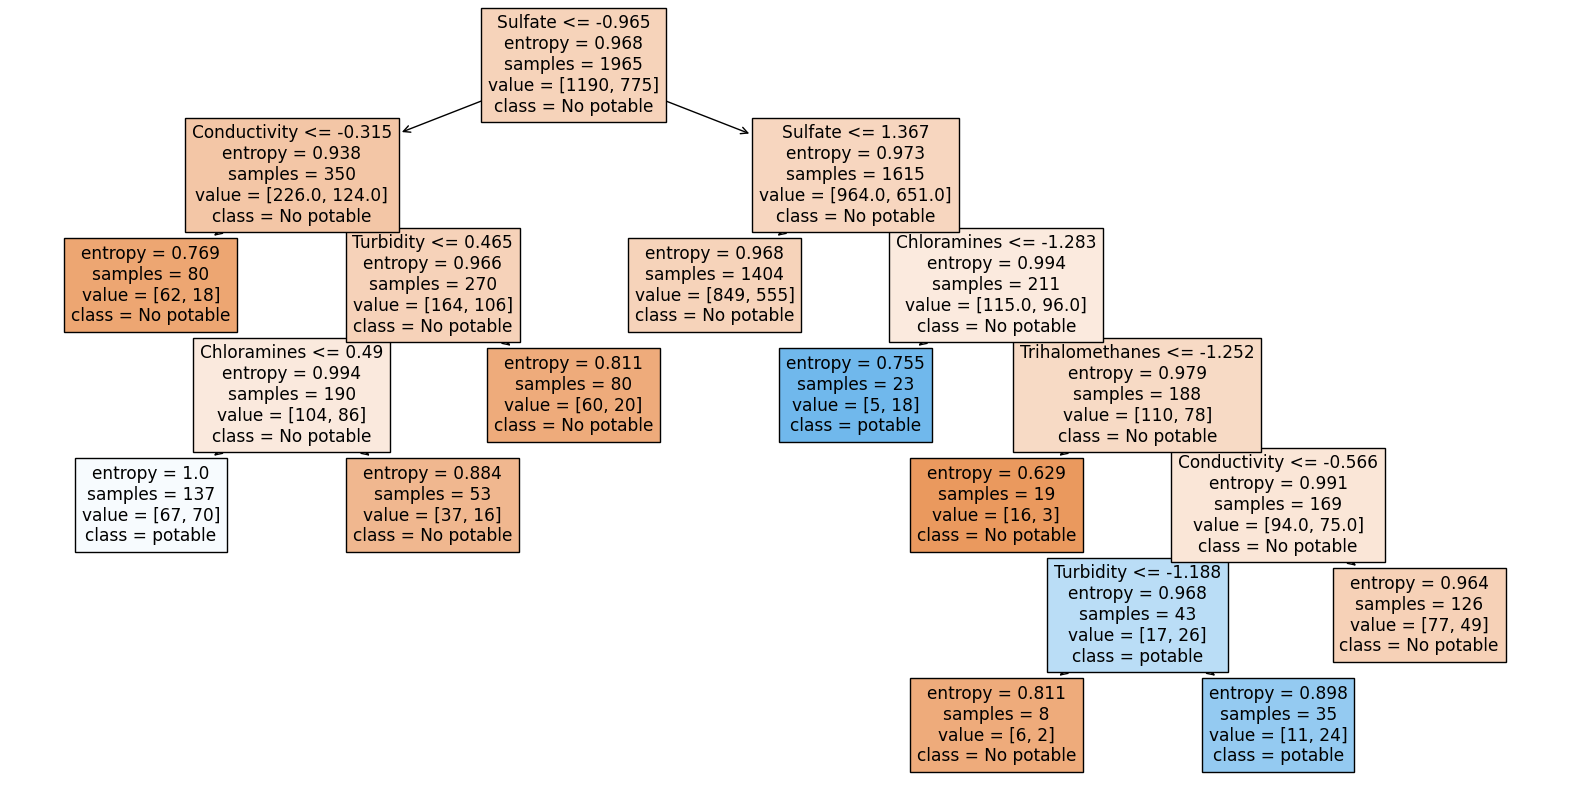

In [58]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_postpruned1, feature_names=x.columns, class_names=['No potable', 'potable'], filled=True)
plt.show()